## Exploratory Analysis on Tourism data and Build Recommendation for Tourism

In [ ]:
# Import required packages
# Read all the files
# Perform the preliminary inspection and analysis on all the datasets, such as data columns, missing values, duplicates, data issues etc.
# Remove any unwanted columns or redundant ones.
# Now perform analysis in-depth such as: 
#    - The age distribution of users visiting the places and giving the ratings.
#    - What are the places from where most of these users (tourists) are coming from?
# Explore the locations and categories of tourist spots.
#    - What are the different categories of tourist spots?
#    - What kind of tourism each city/location most famous or suitable for ?
#    - Which city would be best for a nature enthusiast to visit?
# To better understand tourism we need to create a combined data with places and their ratings.
#    - Calculate weighted average ratings for each place from tourism_with_id data (for simplicity take mean) consider this as ratings variable
#      with place_id and place_rating_avg colmns

ratings = tourism_rating.groupby('Place_Id')[['Place_Ratings']].mean().round(2).reset_index()
ratings.head(2)

# Merge tourism_with_id data with above ratings dataset (left merge)
# Use above data to figure out the spots that are most loved by the tourists, such as most valued place, least valued, frequent visits,
# which city has the most loved tourist spots etc
# Highlight and narrate all the insights you gather from the analysis

*************************************************
# Build a Recommendation model for the tourists:
*************************************************
# Create a dataframe with information about these spots to include User_Id	Place_Id	Place_Ratings	Place_Name	City.

recom_data = tourism_rating.merge(tourism_with_id[["Place_Id", "Place_Name", "City"]], on = "Place_Id", how = "left")
recom_data.head(2)

# Hint: In order to achieve above dataframe you may need to merge tourism_rating with tourism_with_id dataset (left)
# Use the above data to develop a collaborative filtering model for recommendation. 
# And use that to recommend other places to visit using the current tourist location(place name).

# You can group by User_Id, Place_Name 
# example: recom_data.groupby(['User_Id', 'Place_Name'])['Place_Ratings'].mean().unstack()

ratings_data = recom_data.groupby(['User_Id', 'Place_Name'])['Place_Ratings'].mean().unstack()

# Use the above data to develop a content based filtering model for recommendation. 
# And use that to recommend other places to visit using the current tourist location(place name).
# https://www.ibm.com/think/topics/collaborative-filtering

#  Normalize user-item matrix, ratings_data.subtract(ratings_data.mean(axis=1), axis = 'rows') --> data_norm - normal distribution (+- values)

# You can create - # User similarity matrix using Pearson correlation or using pairwise cosine similarity between users

# For now let's use Pearson correlation method, use a threshold e.g 0.3 to drop anything less than this value - these are similar users.

# Overall idea is pick a user whom you want to recommend other places based on the users which are very similar to the picked user.
# Therefore first, pick a target user, find a similar users to target user, then see places where other users visited dropping the one which target user 
# has already visited.

# Places that the target user has visited and rated
picked_userid_rated = data_norm[data_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_rated.T

# Places that similar users visited and rated. 
similar_user_places = data_norm[data_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_places

# Scoring to understand which is best places based other users ratings as below:
# use data_norm and its places column for this.

In [10]:
ratings = pd.read_csv('./Historical_Structures/tourism_rating.csv')
ratings[ratings.Place_Id == 179]['Place_Ratings'].mean()

3.0833333333333335

In [5]:
df.City.unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [1]:
import pandas as pd
df = pd.read_excel('./Historical_Structures/tourism_with_id.xlsx')

In [5]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
"Budaya" in Indonesia means "culture" — but in the Indonesian context, it refers to the rich, diverse set of traditions, values, arts, languages, customs, and social systems that have developed over centuries across the Indonesian archipelago.
✅ Definition
Budaya Indonesia is the collective culture of the Indonesian people — shaped by history, religion, geography, and the mix of ethnic groups throughout the nation.

In [5]:
df.Category.value_counts(True)

Taman Hiburan         0.308924
Budaya                0.267735
Cagar Alam            0.242563
Bahari                0.107551
Tempat Ibadah         0.038902
Pusat Perbelanjaan    0.034325
Name: Category, dtype: float64

In [ ]:
user_id - index
place name - colum
place ratings


In [ ]:
similar_user_places = data_norm[data_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

In [ ]:
# A dictionary to store item scores
item_score = {}
# Loop through items
for i in similar_user_places.columns:
  
  # Get the ratings for place i
  place_rating = similar_user_places[i]
  
  # Create a variable to store the score
  total = 0
  
  # Create a variable to store the number of scores
  count = 0

# A score:
# Its an average weighted score based on correlation value and place rating.
# score = w1*place_rat1+w2*place_rat2 ...... n/number of users

  # Loop through similar users             # This similar_users are coming from threshold what we used earlier 0.3 those are our closest users
  for u in similar_users.index:
    # If the place has rating
    if pd.isna(place_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the place rating
      score = similar_users[u] * place_rating[u]
      # Add the score to the total score for the place so far
      total += score
      # Add 1 to the count
      count +=1
  
  # Get the average score for the item
  item_score[i] = total / count


# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['place', 'place_score'])
    
# Sort the places by score
ranked_item_score = item_score.sort_values(by='place_score', ascending=False)

# Select top m places
m = 10
ranked_item_score.place.tolist()[:10]

In [ ]:
# If needed: Finally you can make it a function module which does all above work in a single function

In [ ]:
['Tektona Waterpark',
 'Masjid Nasional Al-Akbar',
 'Kebun Tanaman Obat Sari Alam',
 'Museum Fatahillah',
 'Glamping Lakeside Rancabali',
 'Rainbow Garden',
 'Upside Down World Bandung',
 'Pelabuhan Marina',
 'Ciputra Waterpark',
 'Kawasan Malioboro']

### Predict Demand For Various Items Across Restaurants:

In [5]:
import cv2
img_path = r"./MAPE.jpg"
image = cv2.imread(img_path)
from matplotlib import pyplot as plt

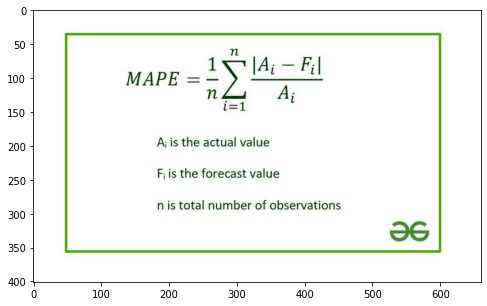

In [8]:
# Import libraries
# Read all the datasets
# Start analysing datasets
# Merge data to create a single data with date item id, price, item count, item names, kcal values, store id and store name
# Hint Merge - pd.merge(sales, items, left_on = "item_id", right_on = "id", how = "left"), 
# data = pd.merge(merged_data, restaurants, left_on = 'store_id', right_on = 'id')

# Group by sales and item count and see the pattern (item_count column)
# Convert your date to weekdays and Find out how the sales fluctuate across different days of the week?
# Convert your date to Month - Look for any noticeable trends in the sales data for different months of the year.
# Convert your date to quarter - Examine the distribution of sales across different quarters averaged over years. Identify any noticeablr pattern in sales
# Perform all on the item count so you understand how items are moving
# Compare the performances of different restaurants.
# Which restaurant had the most sales? Also study the sales for each restaurant across different years months and days
# Perform store wise sales analysis
# year wise sales for each store
# Month wise sales
# Day wise sales
# Why we perform all these above analysis ?

# Identify the most popular items overall and the stores where they are being sold. Also find out the most popular item at the store.
# Popular items restaurant wise - top one for each
# Determine if the store with the highest sales volume is also making the most money per day.
# Identify the most expensive item at each restaurant and find out its calorie count.
# What is the max and min cost of items sold at each restaurant

# Building a time series data: Demand Forecasting

time_series = data.groupby(['date']).agg({'item_count':'sum', 'weekday': lambda x :x.unique()[0],
                            'quarter' : lambda x :x.unique()[0], 'year': lambda x :x.unique()[0],
                            'month_name' : lambda x :x.unique()[0],
                            'year':lambda x :x.unique()[0]})
# y is item_count

# Develop a linear regression, random forest and XGBoost model to predict for the model with the given data. Also, CatBoost
# Compare and comment on the results obtained.
#       - Create required features for development of these models like day of the week, quarter of the year, month, year, day of the month etc.
#       - Use the last six months data as test data.
#       - Compute the RMSE values for each of the models to compare their performances.
#       - Also use these models to forecast for 1 year.
#       - convert the categorical to numeric using ordinal encoder or one hot you can decide

# Generate Test Data - you can split in a time series do not shuffle or randomised the data as it is a time series
# Build above models, perform validation and finally calculate MAPE:
#MAPE formula:

_=plt.figure(figsize=(10,5))
_=plt.imshow(image)

#Last try if you have time
# Try target encoding - train data.
# Use categorical variable Day of the week, Month of the Year, year E.g Monday, Tuesday, Jan, Feb - CatBoost
# Try to categories name column using gpt's to some 10 categories and then create this as a feature of one-hot encoding
#Try to use ETS model only on univariate data i.e item count.

In [ ]:
# Try other models such as LSTM for predicting sales value = (price*item_count)  - Sales Forecasting

In [ ]:
Accuracy = 1-MAPE

In [1]:
import numpy as np
np.abs((95 - 105))/95

0.10526315789473684

In [4]:
import pandas as pd
future_predictors = pd.DataFrame(pd.date_range(start="2022-01-01", end="2022-12-31"), columns=['date'])
future_predictors.index = pd.to_datetime(future_predictors.date)
future_predictors.date.dt.isocalendar().week

date
2022-01-01    52
2022-01-02    52
2022-01-03     1
2022-01-04     1
2022-01-05     1
              ..
2022-12-27    52
2022-12-28    52
2022-12-29    52
2022-12-30    52
2022-12-31    52
Name: week, Length: 365, dtype: UInt32